In [1]:
## importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline

In [2]:
## loading dataset
df = pd.read_csv("Latest Covid-19 India Status.csv")
df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7539,6,7404,129,0.08,98.21,1.71
1,Andhra Pradesh,1970008,20582,1936016,13410,1.04,98.27,0.68
2,Arunachal Pradesh,48565,3508,44823,234,7.22,92.29,0.48
3,Assam,568257,12429,550534,5294,2.19,96.88,0.93
4,Bihar,724917,401,714872,9644,0.06,98.61,1.33


In [3]:
## Checking any null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [4]:
df.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,8.812919e+05,11248.833333,8.582321e+05,11810.972222,2.679722,96.059167,1.261667
std,1.273276e+06,29957.488684,1.231874e+06,22842.176185,5.706423,5.592844,0.567604
min,7.539000e+03,6.000000,7.404000e+03,4.000000,0.020000,68.910000,0.040000
25%,6.494425e+04,363.500000,6.058375e+04,797.000000,0.080000,96.822500,0.937500
50%,4.577400e+05,1277.000000,4.461945e+05,5211.500000,0.670000,98.035000,1.320000
75%,9.854172e+05,10061.250000,9.670425e+05,13439.500000,1.575000,98.615000,1.605000
max,6.315063e+06,165834.000000,6.103325e+06,133038.000000,30.700000,99.820000,2.720000


In [5]:
np.unique(df["State/UTs"])

array(['Andaman and Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telengana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [ ]:
## so there is no repeatable state name

#### Q1. Find which state has highest mean active ratio since reported

In [6]:
# Groupby state names to find their means for confirmed cases

df_group = df.groupby(["State/UTs"])['Active Ratio (%)'].mean()

In [8]:
df_group = df_group.sort_values(ascending = False)[0:15]
df_group

State/UTs
Mizoram              30.70
Sikkim               12.36
Manipur               9.83
Meghalaya             8.86
Arunachal Pradesh     7.22
Kerala                4.84
Nagaland              4.64
Tripura               3.93
Assam                 2.19
Telengana             1.37
Odisha                1.36
Maharashtra           1.25
Andhra Pradesh        1.04
Karnataka             0.83
Tamil Nadu            0.80
Name: Active Ratio (%), dtype: float64

In [9]:
df_group.index

Index(['Mizoram', 'Sikkim', 'Manipur', 'Meghalaya', 'Arunachal Pradesh',
       'Kerala', 'Nagaland', 'Tripura', 'Assam', 'Telengana', 'Odisha',
       'Maharashtra', 'Andhra Pradesh', 'Karnataka', 'Tamil Nadu'],
      dtype='object', name='State/UTs')

Text(0, 0.5, 'Mean of active ratio')

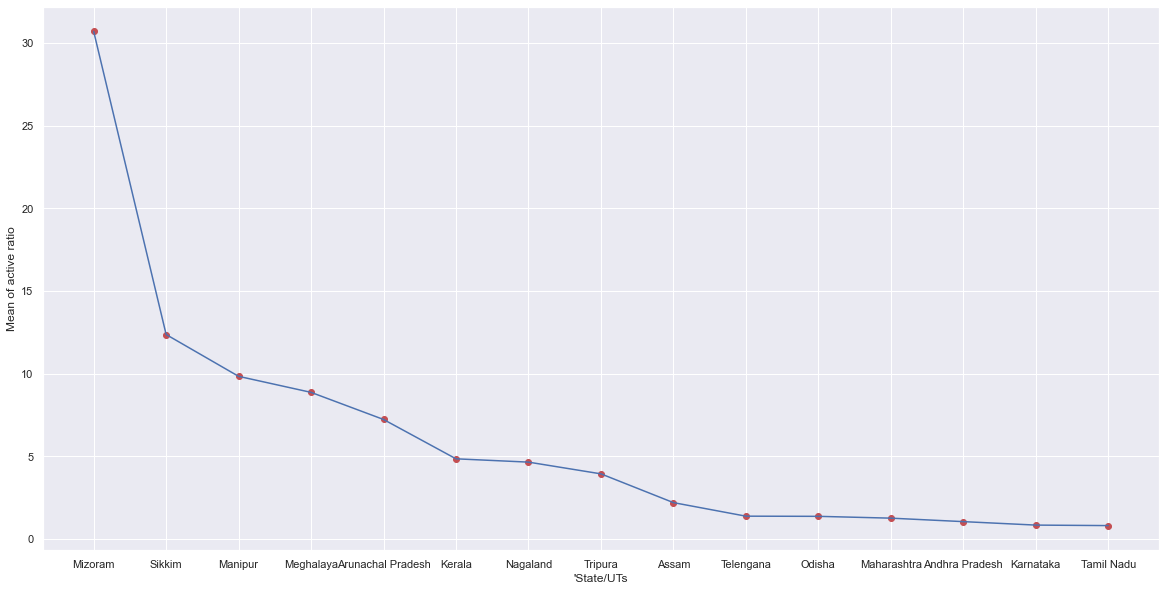

In [11]:
ax = sns.lineplot(x=df_group.index, y= df_group.values)
plt.scatter(x=df_group.index, y= df_group.values, c = 'r')
ax.figure.set_figwidth(20)
ax.figure.set_figheight(10)
ax.set_xlabel("'State/UTs")
ax.set_ylabel("Mean of active ratio")

In [ ]:
### so from above chart we can see that mizoram has highest active ratio

Q2. Which state has highest Death Rate

In [12]:
# Groupby state names to find their means for confirmed cases

df_group_death = df.groupby(["State/UTs"])['Death Ratio (%)'].mean()

In [14]:
df_group_death = df_group_death.sort_values(ascending = False)[0:15]
df_group_death

State/UTs
Punjab                 2.72
Uttarakhand            2.15
Maharashtra            2.11
Nagaland               2.05
Goa                    1.84
Delhi                  1.74
Andaman and Nicobar    1.71
Himachal Pradesh       1.71
Meghalaya              1.68
Manipur                1.58
Jharkhand              1.48
Puducherry             1.48
Jammu and Kashmir      1.36
Chhattisgarh           1.35
Tamil Nadu             1.33
Name: Death Ratio (%), dtype: float64

In [15]:
df_group_death.index

Index(['Punjab', 'Uttarakhand', 'Maharashtra', 'Nagaland', 'Goa', 'Delhi',
       'Andaman and Nicobar', 'Himachal Pradesh', 'Meghalaya', 'Manipur',
       'Jharkhand', 'Puducherry', 'Jammu and Kashmir', 'Chhattisgarh',
       'Tamil Nadu'],
      dtype='object', name='State/UTs')

Text(0, 0.5, 'Mean of Death ratio')

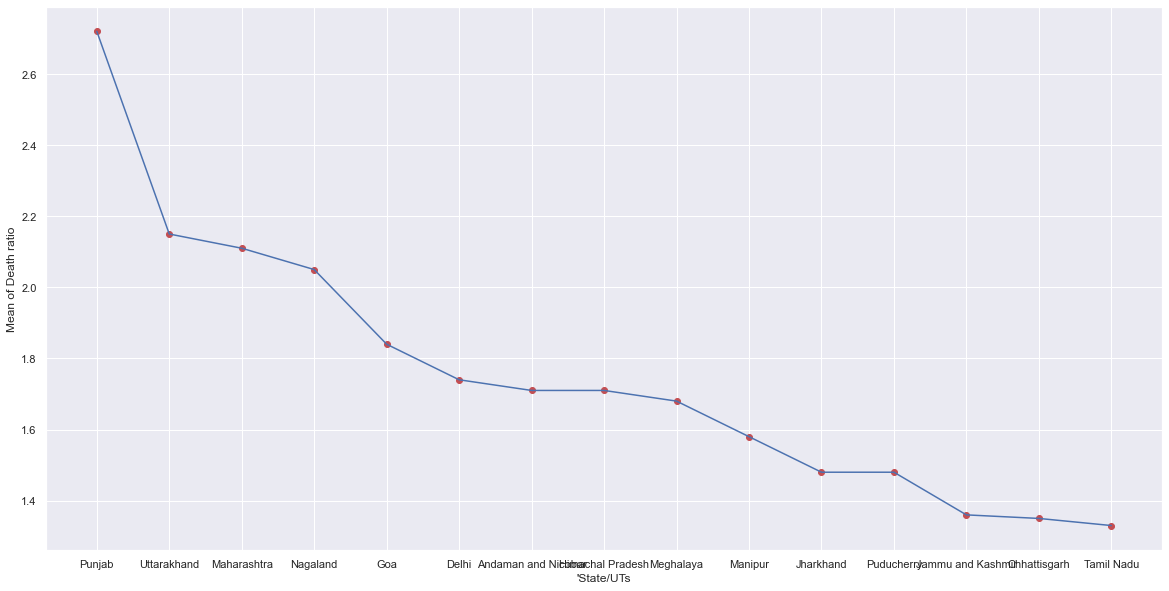

In [16]:
ax = sns.lineplot(x =df_group_death.index ,y =df_group_death.values)
plt.scatter(x=df_group_death.index, y= df_group_death.values, c = 'r')
ax.figure.set_figwidth(20)
ax.figure.set_figheight(10)
ax.set_xlabel("'State/UTs")
ax.set_ylabel("Mean of Death ratio")

### punjab has highest death ratio